In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchinfo import summary

5


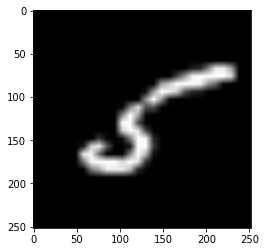

In [2]:
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True)
image, label = train_dataset[11]
print(label)
plt.imshow(image, cmap="gray")
a = transforms.Resize(252)(image)
plt.imshow(a, cmap="gray")

# Training Vanilla CNN for MNIST Data

In [4]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1014, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1, 1014)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = CNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 0.6733 
Epoch [1/1], Step [200/1875], Loss: 0.2787 
Epoch [1/1], Step [300/1875], Loss: 0.3791 
Epoch [1/1], Step [400/1875], Loss: 0.3074 
Epoch [1/1], Step [500/1875], Loss: 0.1071 
Epoch [1/1], Step [600/1875], Loss: 0.1207 
Epoch [1/1], Step [700/1875], Loss: 0.1889 
Epoch [1/1], Step [800/1875], Loss: 0.4430 
Epoch [1/1], Step [900/1875], Loss: 0.2902 
Epoch [1/1], Step [1000/1875], Loss: 0.1656 
Epoch [1/1], Step [1100/1875], Loss: 0.0938 
Epoch [1/1], Step [1200/1875], Loss: 0.2238 
Epoch [1/1], Step [1300/1875], Loss: 0.0591 
Epoch [1/1], Step [1400/1875], Loss: 0.0747 
Epoch [1/1], Step [1500/1875], Loss: 0.1415 
Epoch [1/1], Step [1600/1875], Loss: 0.0189 
Epoch [1/1], Step [1700/1875], Loss: 0.0102 
Epoch [1/1], Step [1800/1875], Loss: 0.0465 


In [5]:
def data_aug(img_tensor):
    aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
    aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
    aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
    #aug = transforms.RandomGrayscale(0.2)(aug)
    aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
    aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
    #aug = transforms.Normalize()(aug)
    return aug
    

N = 64
data = torch.rand(N,1,20,20)
data = data_aug(data)
print(data.shape)
conv1 = nn.Conv2d(1, 12, kernel_size=1)
conv2 = nn.Conv2d(12, 6, kernel_size=3)
max_pool = nn.MaxPool2d(2, 2)
x = conv1(data)
print(x.shape)
x = conv2(x)
print(x.shape)
x = max_pool(x)
print(x.shape)
x = x.view(-1,486)
fc1 = nn.Linear(486, 256)
x = fc1(x)
print(x.shape)
fc2 = nn.Linear(256, 128)
x = fc2(x)
print(x.shape)
fc3 = nn.Linear(128,10)
x = fc3(x)
print(x.shape)

torch.Size([64, 1, 20, 20])
torch.Size([64, 12, 20, 20])
torch.Size([64, 6, 18, 18])
torch.Size([64, 6, 9, 9])
torch.Size([64, 256])
torch.Size([64, 128])
torch.Size([64, 10])


## Testing Torch Augmentations

In [7]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(486, 256)
        self.fc2 = nn.Linear(256, 128)
        # change output channels to multiples of 2 --> maybe 16, 32??
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,486)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    

model = CNN_augs().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        images = model.data_aug(images)
        labels = labels.to(device)

        outputs = model(images)
        # compute loss between two different data augs!
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 2.3179 
Epoch [1/1], Step [200/1875], Loss: 2.3040 
Epoch [1/1], Step [300/1875], Loss: 2.3448 
Epoch [1/1], Step [400/1875], Loss: 2.2355 
Epoch [1/1], Step [500/1875], Loss: 2.2036 
Epoch [1/1], Step [600/1875], Loss: 2.2517 
Epoch [1/1], Step [700/1875], Loss: 2.2996 
Epoch [1/1], Step [800/1875], Loss: 2.2830 
Epoch [1/1], Step [900/1875], Loss: 2.2156 
Epoch [1/1], Step [1000/1875], Loss: 2.2059 
Epoch [1/1], Step [1100/1875], Loss: 2.3068 
Epoch [1/1], Step [1200/1875], Loss: 2.2305 
Epoch [1/1], Step [1300/1875], Loss: 2.3327 
Epoch [1/1], Step [1400/1875], Loss: 2.2938 
Epoch [1/1], Step [1500/1875], Loss: 2.0780 
Epoch [1/1], Step [1600/1875], Loss: 2.1877 
Epoch [1/1], Step [1700/1875], Loss: 2.1863 
Epoch [1/1], Step [1800/1875], Loss: 2.1506 


In [6]:
model = CNN_augs().to(device=device)
summary(model, input_size=[(batch_size, 1, 20, 20)])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_augs                                 [128, 10]                 --
├─Conv2d: 1-1                            [128, 12, 20, 20]         24
├─Conv2d: 1-2                            [128, 6, 18, 18]          654
├─MaxPool2d: 1-3                         [128, 6, 9, 9]            --
├─Linear: 1-4                            [128, 256]                124,672
├─Linear: 1-5                            [128, 128]                32,896
├─Linear: 1-6                            [128, 10]                 1,290
Total params: 159,536
Trainable params: 159,536
Non-trainable params: 0
Total mult-adds (M): 48.69
Input size (MB): 0.20
Forward/backward pass size (MB): 7.31
Params size (MB): 0.64
Estimated Total Size (MB): 8.15

# Implementing VICReg

In [31]:
#Hyper Parameters
batch_size = 64
learning_rate = 0.001
epochs = 5
# Dimension (D) of the representations
D = 10
lam = 1
mu = 0.1
nu = 1e-09

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(486, 256)
        self.fc2 = nn.Linear(256, 128)
        # change output channels to multiples of 2 --> maybe 16, 32??
        self.fc3 = nn.Linear(128,D)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,486)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    def off_diagonal(self, x):
        n, m = x.shape
        assert n == m
        return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()
        
    

model_vicreg = CNN_augs().to(device=device)
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_vicreg.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # two randomly augmented versions of image
        image_i = model_vicreg.data_aug(images)
        image_j = model_vicreg.data_aug(images)

        labels = labels.to(device)
        #compute representations
        output_i = model_vicreg(image_i)
        output_j = model_vicreg(image_j)

        #invariance loss
        sim_loss = nn.MSELoss()
        sim_loss = lam * sim_loss(output_i, output_j)

        #variance loss
        std_output_i = torch.sqrt(torch.var(output_i, dim=0) + 1e-04)
        std_output_j = torch.sqrt(torch.var(output_j, dim = 0) + 1e-04)
        std_loss = torch.mean(F.relu(1-std_output_i)) + torch.mean(F.relu(1-std_output_j))

        #covariance loss
        output_i = output_i - torch.mean(output_i, dim=0)
        output_j = output_j - torch.mean(output_j, dim=0)
        cov_output_i = (torch.matmul(torch.transpose(output_i, 0, 1), output_i) / (batch_size -1))
        cov_output_j = (torch.matmul(torch.transpose(output_j, 0, 1), output_j) / (batch_size -1))
        cov_loss = (model_vicreg.off_diagonal(cov_output_i).pow(2).sum() / D) + (model_vicreg.off_diagonal(cov_output_j).pow(2).sum() / D)

        # compute loss between two different data augs!
        loss = (sim_loss) + (mu * std_loss) + (nu*cov_loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/5], Step [100/938], Loss: 0.1966 
Epoch [1/5], Step [200/938], Loss: 0.1955 
Epoch [1/5], Step [300/938], Loss: 0.1955 
Epoch [1/5], Step [400/938], Loss: 0.1956 
Epoch [1/5], Step [500/938], Loss: 0.1955 
Epoch [1/5], Step [600/938], Loss: 0.1959 
Epoch [1/5], Step [700/938], Loss: 0.1942 
Epoch [1/5], Step [800/938], Loss: 0.1950 
Epoch [1/5], Step [900/938], Loss: 0.1955 
Epoch [2/5], Step [100/938], Loss: 0.1957 
Epoch [2/5], Step [200/938], Loss: 0.1956 
Epoch [2/5], Step [300/938], Loss: 0.1950 
Epoch [2/5], Step [400/938], Loss: 0.1949 
Epoch [2/5], Step [500/938], Loss: 0.1941 
Epoch [2/5], Step [600/938], Loss: 0.1950 
Epoch [2/5], Step [700/938], Loss: 0.1957 
Epoch [2/5], Step [800/938], Loss: 0.1947 
Epoch [2/5], Step [900/938], Loss: 0.1934 
Epoch [3/5], Step [100/938], Loss: 0.1948 
Epoch [3/5], Step [200/938], Loss: 0.1964 
Epoch [3/5], Step [300/938], Loss: 0.1950 
Epoch [3/5], Step [400/938], Loss: 0.1948 
Epoch [3/5], Step [500/938], Loss: 0.1961 
Epoch [3/5]

## Downstream tasks
- **Classification**
- Regression
- Simulate representation of the data
- Autoencoder --> anomaly detection

In [80]:
a = torch.tensor([[4,0,0,0],[0,5,0,0],[0,0,6,0],[0,0,0,7]])
a

tensor([[4, 0, 0, 0],
        [0, 5, 0, 0],
        [0, 0, 6, 0],
        [0, 0, 0, 7]])

In [81]:
def off_diagonal(x):
    n, m = x.shape
    # checking we have a square matrix where columns and rows are the same
    assert n == m
    off_diag = x.clone()
    off_diag = off_diag.flatten()
    # getting all elements except the last corner element
    off_diag  = off_diag[:-1]
    # reshape the tensor with remaining elements
    off_diag = off_diag.view(n-1, n+1)
    # the first slice is gathering all rows, the second slice is getting every columns except the first 
    off_diag = off_diag[:, 1:]
    # flattening matrix
    off_diag = off_diag.flatten()
    return off_diag
    #return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()

In [83]:
off = off_diagonal(a)
off.shape

torch.Size([12])

In [87]:
a = torch.tensor([1,4,3])
b = torch.pow(a,2).sum()
b

tensor(26)

In [19]:
a = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(a)
tran = torch.transpose(a, 0, 1)
print(tran)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
